In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'yolov3-weights:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F945925%2F1602520%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240308%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240308T112828Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D88691456a54b918a035e04b3d2e4ebabd80931881a8edb1f0ca7e725089d9b07d853914ca3fc60df54bf00e5e35038d419d3360b4159ab746a49a147fc73ca1554d8d94ee48841b88de40a064dc1d27455181ba354943760d4e1f01066b006e370269eeaa45756350090c97a702f02c4d0509d7feba82f0a57b8e309f34570fb48b7e7652a130daffc5880c2d0e2688691b612d17de5f961dcef3e176b43a6f713ea9d7e662fb7aa9cd1ecc6cd7b268c8c49b5d695fcb267fe1045531d78d575ca9b7f49a5e0d844cb9b2407addfc897e4ca409a8d7a40adb5f39b150d3cfbf655e7176ca28cfdc63cae57911b08a542cec283a26430eca97be223c41071d115,shape-predictor-68-face-landmarksdat:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1151215%2F1929873%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240308%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240308T112828Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7bfdab9488d2689b8b6b1c911bc6e5bb278ed81f4cb751507a36f8da4f7b38911d0ae2f1a1a2e8b8694ab6a9c79f81f16d15ed8233f5726128c05f04d4fbdc49e09756077eced4a57e89e50aab8ff5b28ad83ac8f10eafc0cf0014bd29712121a203dd89870f1f5df174d4ad0fddbb45aec1ea9452223ca7a2e1880d7b5f98417f91014ca2caa2994c83582c323f2f4cd3efcea91a6c2679dd4a9517ee3d9abfa6f8b76300d3f59a5e75b962e5997e79fe3346514aec437b668432724fc984f807996f411fc4e5cd817fed67256895fd4577bfc2d4b32284905340c320512f49027fdf79299986100eb3484e95f856218701e01362831f3ee540ad24d4bb07a9,coconames:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1484430%2F2452462%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240308%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240308T112829Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D51666150f69a0ae0c600ab4c99143fa2dd4c7eafeaba9f3e6b9e75e85e6514218051ee07009aae234435873e3f90b2e74725e6c52d2c87c5ce8e0bf7d790f3a4923b5d8780ab5404af6ea5d1899688a44b956f5d42c04e8bb71d2cdfaf99d492de535adf24348639e51371fa6f9fc3b01b1c0aec63bfe4e375e967d6d38bf8b55eb711b976d2a99bd5942198d64cc162ede1abf3fe5bc3656886890a6a5593b340c99501af359b6382d283eab84c7d2c290242e2ac4b1787a7abcfe141f23ecc6ff3c9d63de96d7ad7f5e26ae0e94221b1372c5a409d62174491204f1de401d4273d66482bc9d426a5997eca1b88c52c4972c5674625ac512275fede7262afb6,uta-reallife-drowsiness-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2839089%2F4895821%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240308%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240308T112829Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D98a7849fed183ff0eb903a2ac2f2cd4280d3aa9d563a5b45452b2bc98f4b0ff9924cb1b9319527b495ccadadb7b6708899962f58dbc2d92ec1c410330e795f5bb59fec8458b5cf397a4208f92dc4446358a0fb11592de92f7822cf9d7ca0f1ccc261c11b3c9a8b2db129e9722f81360b616b98c82b53b6542525e63c4c02e3cd94d21ae8fe0e5cbe2cb4ccd0fae7ba2c72b50220b77e5eb2f9e165ede99fc127a23f7f20d3d64eeb115c6182e2e7740e6f813657c1152cf312e08c2667fae339a8350ed659fc33a5ebb9f0e88b8788c69ccf24436dbcc9f3c3191d3c46cf1c43eca09699df0ecef14dd222946a5df78e2c1d6309a0d63e0c0306e009abce2acb,drowsy-festure:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4531488%2F7750718%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240308%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240308T112829Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D53b74dfb68049b07c36e219ad0394c689f8d4fd670a0d4ac8b7153850c3ae21d25b1e6a852b0eab6e739c45ecf0a838fda14f605742c827319acf0fac3c0da58b2bb1b30a29e92c9a04ad607223f2d2adb535b56a5da959ec0e818bdcfcba019b5cde339f9c8d72dd7a9e7e6e45deeb12548dc391cff2200be14b47eea410280af23c41ca5f9d98cf4a4dc21cefbf7136be43a18fed6feeaab942709e19476f24178f056068e52976901d554124dcbc1020a3f08159439e1bcbdeea318152776be4547e6023de3e6ffd31edccbd6d072b8345c461a481543af1521cd9d61007a448ed38989e7856896a47ae7b60f4d211983b1794850807a761dbf1f0b5c51ed'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat
/kaggle/input/yolov3-weights/yolov3.weights
/kaggle/input/coconames/coco.names
/kaggle/input/drowsy-festure/Extract features.csv
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/47/5.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/47/10.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/47/0.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/45/5.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/45/10.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/45/0.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/42/5.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/42/10.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part2/42/0.mp4
/kaggle/input/uta-reallife-drowsiness-dataset/Fold4_part2/Fold4_part

In [ ]:
!pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 53.2 MB/s eta 0:00:0000:010:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dlib: filename=dlib-19.24.2-cp310-cp310-linux_x86_64.whl size=3301369 sha256=8f1c1ccf84d6242700adde70298ef0139624bd0fac7abc7e2892073e4ae2cf25
  Stored in directory: /root/.cache/pip/wheels/9b/e2/80/888fdc098db86b463ff0c83ae5e5ca151889e901bc1e9a3a11
Successfully built dlib


# # feature extraction

In [ ]:
import cv2
import dlib
import numpy as np
import pandas as pd

# Load the pre-trained face detector from dlib
detector = dlib.get_frontal_face_detector()

# Load the facial landmarks predictor
# Replace the path with the correct location of your shape_predictor_68_face_landmarks.dat file
predictor = dlib.shape_predictor("/kaggle/input/shape-predictor-68-face-landmarksdat/shape_predictor_68_face_landmarks.dat")

# Function to calculate EAR
def eye_aspect_ratio(eye):
    x = [point.x for point in eye]
    y = [point.y for point in eye]
    A = np.linalg.norm(np.array([x[1] - x[5], y[1] - y[5]]))
    B = np.linalg.norm(np.array([x[2] - x[4], y[2] - y[4]]))
    C = np.linalg.norm(np.array([x[0] - x[3], y[0] - y[3]]))
    ear = (A + B) / (2.0 * C)
    return ear

# Function to calculate PUC
def pupil_to_eye_center_distance(eye):
    x = [point.x for point in eye]
    y = [point.y for point in eye]
    d = np.linalg.norm(np.array([x[0] - x[3], y[0] - y[3]]))
    return d

# Function to calculate MAR
def mouth_aspect_ratio(mouth):
    x = [point.x for point in mouth]
    y = [point.y for point in mouth]
    A = np.linalg.norm(np.array([x[13] - x[19], y[13] - y[19]]))
    B = np.linalg.norm(np.array([x[14] - x[18], y[14] - y[18]]))
    C = np.linalg.norm(np.array([x[15] - x[17], y[15] - y[17]]))
    mar = (A + B + C) / (3.0 * np.linalg.norm(np.array([x[12] - x[16], y[12] - y[16]])))
    return mar

# Function to calculate MOE
def mouth_to_eye_ratio(eye, mouth):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(mouth)
    if ear == 0:  # Avoid division by zero
        return 0
    moe = mar / ear
    return moe

# Function to extract features and label from a frame
def extract_features(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = detector(gray)

    features = []
    labels = []

    for face in faces:
        # Predict the facial landmarks
        shape = predictor(gray, face)

        # Calculate EAR, PUC, MAR, and MOE
        ear = eye_aspect_ratio(shape.parts()[36:42])
        puc = pupil_to_eye_center_distance(shape.parts()[3642])
        mar = mouth_aspect_ratio(shape.parts()[48:68])
        moe = mouth_to_eye_ratio(shape.parts()[36:42], shape.parts()[48:68])

        # Define your condition for drowsiness detection
        # For example, if EAR is below a certain threshold, and MAR and PUC are also below thresholds, consider it as drowsy
        drowsy = 1 if ear < 0.2 or mar > 0.4 or puc < 70 or moe > 0.2 else 0

        # Append features and label to the lists
        features.append([ear, puc, mar, moe])
        labels.append(drowsy)

    return features, labels

# Directory containing UTA dataset video
uta_dataset_video_path = "/kaggle/input/uta-reallife-drowsiness-dataset/Fold1_part1/Fold1_part1/01/0.mov"

# Open video capture
cap = cv2.VideoCapture(uta_dataset_video_path)

all_features = []
all_labels = []

# Frame skipping configuration
frame_skip = 5  # Process every 5th frame
counter = 0

# Read frames from the video
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    counter += 1
    if counter % frame_skip != 0:
        continue

    # Extract features and label from the current frame
    features, labels = extract_features(frame)
    all_features.extend(features)
    all_labels.extend(labels)

# Release the video capture object
cap.release()

# Convert the lists of features and labels to a DataFrame
column_names = ["EAR", "PUC", "MAR", "MOE"]
df_features = pd.DataFrame(all_features, columns=column_names)
df_labels = pd.DataFrame({"drowsy": all_labels})

# Concatenate features and labels DataFrames
df = pd.concat([df_features, df_labels], axis=1)

# Display the DataFrame with extracted features and labels
print(df)


In [ ]:
csv_file_path = '/kaggle/input/drowsy-festure/Extract features.csv'
# Save the DataFrame to a CSV file
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with your DataFrame
# For example, you can print the first few rows of the DataFrame
print(df.head())




        EAR        PUC       MAR       MOE  drowsy
0  0.289598  76.006579  0.081149  0.280211       1
1  0.298701  77.000000  0.089677  0.300222       1
2  0.306356  80.006250  0.053830  0.175710       0
3  0.325139  80.024996  0.029812  0.091689       0
4  0.356792  80.000000  0.009103  0.025515       0


In [ ]:
df.drop(['PUC', 'MOE'], axis=1, inplace=True)


In [ ]:
df

,EAR,MAR,drowsy
0,0.289598,0.081149,1
1,0.298701,0.089677,1
2,0.306356,0.053830,0
3,0.325139,0.029812,0
4,0.356792,0.009103,0
...,...,...,...
3604,0.298051,0.024935,0
3605,0.308263,0.006100,0
3606,0.312387,0.010434,0
3607,0.326263,0.011578,0


In [ ]:
df = pd.concat([df, df_drowsy], ignore_index=True)

In [ ]:
df = pd.concat([df, df_drowsy], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EAR     5219 non-null   float64
 1   MAR     5219 non-null   float64
 2   drowsy  5219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 122.4 KB


In [ ]:
print(y)

[1 1 0 ... 0 0 0]


In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam


# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df['drowsy'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input (assuming each sample has 2 features)
X_train = X_train.reshape(X_train.shape[0], 1, 2, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 2, 1)

# Create the CNN model
model = Sequential()
model.add(Conv2D(512, kernel_size=(1, 2), activation='relu', input_shape=(1, 2, 1)))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
Dropout(0.5)
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Specifying learning rate for Adam optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 1, 1, 512)      │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 1, 1, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,897 (691.00 KB)

 Trainable params: 175,489 (685.50 KB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7389 - loss: 0.5213 - val_accuracy: 0.5228 - val_loss: 0.7274
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7673 - loss: 0.4693 - val_accuracy: 0.5228 - val_loss: 0.6420
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7664 - loss: 0.4814 - val_accuracy: 0.7071 - val_loss: 0.4923
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7651 - loss: 0.4671 - val_accuracy: 0.7884 - val_loss: 0.4522
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7793 - loss: 0.4513 - val_accuracy: 0.7867 - val_loss: 0.4261
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7631 - loss: 0.4578 - val_accuracy: 0.7900 - val_loss: 0.4239
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7642 - loss: 0.4705 - val_accuracy: 0.7925 - val_loss: 0.4247
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7863 - loss: 0.4445 - val_acc

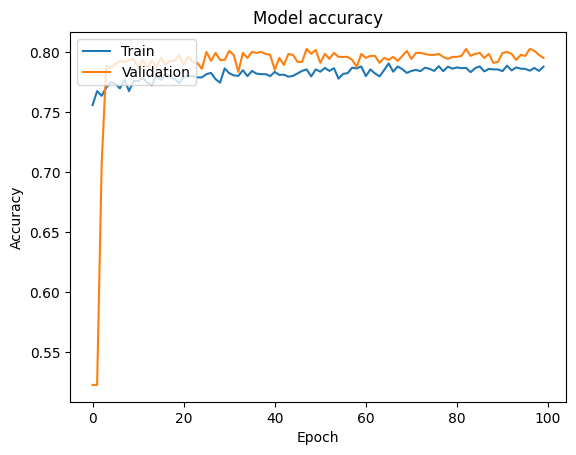

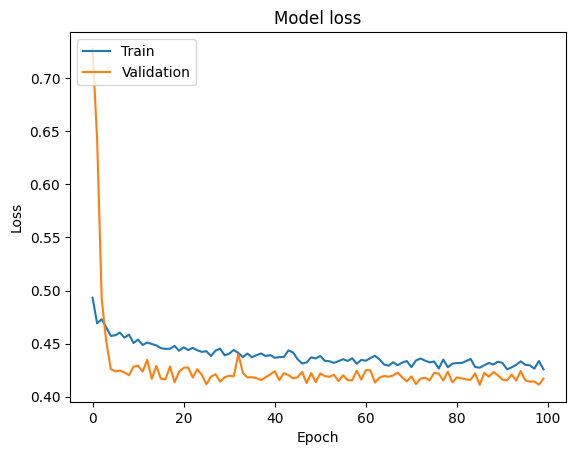

In [ ]:
import matplotlib.pyplot as plt

# Train the model
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(X)

[[[[0.28959806]]

  [[0.08114857]]]


 [[[0.2987013 ]]

  [[0.08967682]]]


 [[[0.30635622]]

  [[0.05382976]]]


 ...


 [[[0.3123867 ]]

  [[0.010434  ]]]


 [[[0.32626304]]

  [[0.01157788]]]


 [[[0.31399748]]

  [[0.00848827]]]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential()

# Flatten layer to convert 2D input to 1D
model.add(Flatten(input_shape=(2, 1)))

# Input layer

# Hidden layers
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='sigmoid')) # Output layer with sigmoid activation for binary classification

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.round(y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1024)           │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 702,209 (2.68 MB)

 Trainable params: 701,313 (2.68 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
 75/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 0.5475

W0000 00:00:1709519582.717404     293 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7424 - loss: 0.5299

W0000 00:00:1709519584.599664     295 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


151/151 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7424 - loss: 0.5298 - val_accuracy: 0.7975 - val_loss: 0.4795
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7506 - loss: 0.4947 - val_accuracy: 0.7934 - val_loss: 0.4301
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss: 0.4674 - val_accuracy: 0.7967 - val_loss: 0.4220
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7616 - loss: 0.4664 - val_accuracy: 0.7917 - val_loss: 0.4264
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4549 - val_accuracy: 0.7959 - val_loss: 0.4129
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.4499 - val_accuracy: 0.8000 - val_loss: 0.4216
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7808 - loss: 0.4520 - val_accuracy: 0.8000 - val_loss: 0.4140
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.4428 - val_accuracy: 0.788

W0000 00:00:1709519626.188774     292 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Accuracy: 0.7983402489626557
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81       575
           1       0.90      0.69      0.78       630

    accuracy                           0.80      1205
   macro avg       0.82      0.80      0.80      1205
weighted avg       0.82      0.80      0.80      1205



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[513  62]
 [185 445]]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

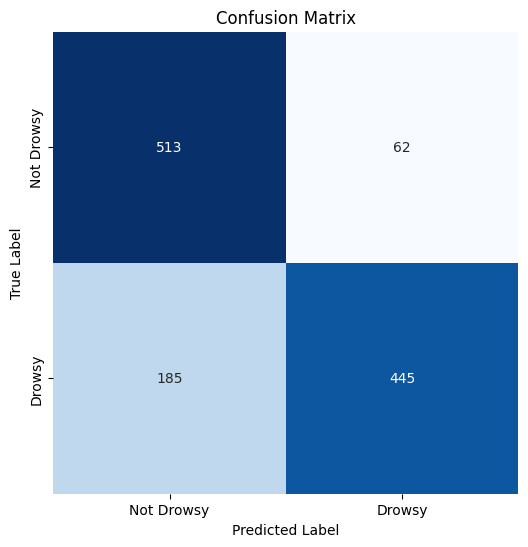

In [ ]:
# Define class labels
class_labels = ['Not Drowsy', 'Drowsy']

# Create a heatmap for the confusion matrix with proper labels
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model.save('drowsy.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np

# Original list
fake_data = np.array([0.18457133488455402, 0.0049552943083144415])

# Convert the list to a numpy array and reshape it to have 1 row and 2 columns
array_2d = np.array(fake_data).reshape(1, 2)

# Scale the data
array_2d_scaled = scaler.transform(array_2d)

# Reshape the scaled data to match the input shape expected by the model (1 sample, 2 rows, 1 column, 1 channel)
array_2d_reshaped = array_2d_scaled.reshape(1, 2, 1, 1)

# Use the reshaped array as input to model.predict
prediction = model.predict(array_2d_reshaped)

print(prediction)


1/1 [==============================] - 0s 19ms/step
[[0.84163177]]


In [ ]:
joblib.dump(scaler, 'scaler1.pkl')


['scaler1.pkl']